# 5PAHPPSY: Big Data Analytics in Python: Session 3

___

_Jodie Lord<br/>
Department of Basic and Clinical Neuroscience<br/>
Institute of Psychiatry, Psychology and Neuroscience<br/>
King's College London<br/>
jodie.lord@kcl.ac.uk_
___

## 😍 Today's Learning Objectives:
<br/>

1. Explore the world of charting in python via two key charting libraries:
    - MatPlotLib 📊
    - seaborn 🐬


2. Learn how to carry out some basic statistics 📈


3. Combine learning from charting libraries and statistics to produce meaningful visualisations for statistics produced. 
___

### ✋ BUT FIRST - ITS TIME TO RECAP AGAIN

## <font color=green>⌨ Recap Exercises </font>

**R1: Loops 🔃**

In [3]:
#Create a list of variables from 10:100 in steps of 10. Assign this list to the object "tens"
tens=[10,20,30,40,50,60,70,80,90,100]

#print this list of items onto the screen using a for loop:
for i in tens:
    print(i)


10
20
30
40
50
60
70
80
90
100


In [4]:
"""Using a loop, assign the variables within the "tens" list to the "under50" list generated for you below, but ONLY 
if the variable is equal to or less than 50 (this should result in an under50 list of 5 variables).
Hint1: You wil need to use an if statement here
Hint2: Make use of .append() to add items to an existing list (google if unsure!)"""

# Initiating empty list
under50=[]

for i in tens:
        if i <= 50:
            under50.append(i)
            

# Print the under50 to the console:
print(under50)

[10, 20, 30, 40, 50]


**R2: pandas 🐼**

In [5]:
# Load in the cognitive_scores.csv file and assign to the object "df1" 
# Hint1: Make sure you've imported your necessary libraries!
# Hint2: If python doesn't recognise your csv file: 1) have you spelt the filename correctly?! 2) Are you pointing to the correct directory?

# Importing pandas
import pandas as pd

# Load in cognitive_scores.csv
df1=pd.read_csv("cognitive_scores.csv")

# Print the head of the df into the console:
df1.head()


,ID,CogTest1,CogTest2,CogTest3,SpeedComp,MusicComp,Gender
0,1,108.756737,104.833811,102.045425,99.640708,-12.422274,Female
1,2,90.095813,102.409863,101.810524,94.647578,-21.957400,Male
2,3,106.486065,99.609672,104.639634,97.017918,-12.021204,Female
3,4,86.592246,94.614533,94.235260,93.256093,-12.365424,Male
4,5,97.716824,100.397229,96.398172,100.191845,-17.512151,Female


In [6]:
# Load in the second csv file: "clinical_scores.csv" and assign it to the object "df2"
df2=pd.read_csv("clinical_scores.csv")

# Print rows 10:20 of this second df into the console (remember indexing starts at 0!):
df2[9:20]

,ID,Diagnosed,APOE4,MRI_Count,Sex,Weight,Height
9,10,1,1,0.945741,0,61.593617,147.865169
10,11,1,1,-0.590562,0,62.696220,159.483084
11,12,1,1,-0.929773,0,62.783128,149.509590
12,13,1,2,-0.422329,1,60.755255,154.193179
13,14,1,1,0.474903,1,60.285925,149.823957
14,15,1,0,0.319452,1,59.879320,150.275110
15,16,0,2,1.941133,1,59.221300,140.607183
16,17,0,1,-0.392171,0,61.354818,158.097912
17,18,0,1,0.369890,0,61.720654,157.270446
18,19,0,1,-0.416157,1,60.702057,147.913517


**R3: Working with data 🛠**

In [7]:
# Merge df1 and df2 together using an inner join
df_all=df1.merge(df2, on = ['ID'],how = 'inner')

#View the tail of the newly merged df:
df_all.tail()

,ID,CogTest1,CogTest2,CogTest3,SpeedComp,MusicComp,Gender,Diagnosed,APOE4,MRI_Count,Sex,Weight,Height
1991,1996,101.325996,108.573612,93.774230,101.885113,-8.562653,Male,0,1,1.057948,0,63.117434,147.827757
1992,1997,101.559177,98.831934,101.443590,96.476012,3.690253,Female,0,1,-1.630422,1,59.371146,150.849126
1993,1998,97.015739,99.591672,104.843310,94.983441,-5.696289,Female,1,1,-0.053309,1,61.757806,148.077170
1994,1999,101.389988,100.603440,98.860361,97.850858,-8.267285,Female,0,1,2.218971,1,59.581950,147.828045
1995,2000,97.066737,104.068613,100.382611,99.812662,-3.982356,Male,1,2,0.385601,0,62.916433,155.351363


In [8]:
# Confirm shape of df1
print(df1.shape)

# Confirm shape of df2
print(df2.shape)

#Confirm shape of df_all
print(df_all.shape)

### RMEMBER YOU CAN ALSO PRINT TEXT AND NUMERIC OUTPUTS TOGETHER USING A COMMA SEPERATOR.
### e.g. TO BE A LITTLE MORE EXPLICIT / FANCY, YOU COULD ALSO OUTPUT WITH TEXT CONTEXT:
print("the number of rows and columns within df_all are", df_all.shape, "respectively.")

(1996, 7)
(2000, 7)
(1996, 13)
the number of rows and columns within df_all are (1996, 13) respectively.


In [9]:
# Do we have any nas in our merged dataset? - check using isna() and the sum() command:
print(df_all.isna().sum())

ID            0
CogTest1     12
CogTest2      7
CogTest3      5
SpeedComp     0
MusicComp     0
Gender        0
Diagnosed     0
APOE4         0
MRI_Count     0
Sex           0
Weight        0
Height        0
dtype: int64


In [10]:
#Create a new df object called df_nonulls which is df_all but with all nas dropped:
df_nonulls=df_all.dropna()

In [11]:
# Confirm the number of participants we have in the df_nonulls dataset
len(df_nonulls)

1977

In [12]:
# Confirm the mean of the Height column in df_nonulls, grouped by gender
print(df_nonulls[["Height", "Gender"]].groupby('Gender').mean())

### Note: You can round the output to 1 decimal place by wrapping your command with the round() function:
round(df_nonulls[["Height", "Gender"]].groupby('Gender').mean())

            Height
Gender            
Female  149.202864
Male    155.661803


,Height
Gender,
Female,149.0
Male,156.0


______________________

## (1) Charting Libraries 📊🐬

* Last week we learnt how to explore our data using some key descriptives and interrogating our data output. 


* Another important step of data exploration is through the use of charting and visualisation. This allows you to quickly eyeball trends within the data, easily spot seperation within the data (e.g. between two groups), or identify potential problems such as outliers.


* Today we will be using two charting libraries available within python to visualise our data:

    + **matplotlib** 📊 - the standard / legacy plotting library within python (see: https://matplotlib.org/)
    + **seaborn** 🐬 - a library built on top of matplotlib which helps to make your plots look pretty 🌸 (see: https://seaborn.pydata.org/).


### **Accessing charting libraries**

* As with all libraries, to make use of both matplotlib and seaborn, we first need to import them in: 

In [13]:
# Importing matplotlib and assigning to name "plt"
import matplotlib.pyplot as plt

# Importing seaborn and assigning to name "sns"
import seaborn as sns

* 🔊 **NOTE**: When working within Jupyter Notebook, it is also important to **always** use the below magic function when you import matplotlib, otherwise you won't be able to see your plots! 👇

In [14]:
# Allowing plots to print inline with notebook:
%matplotlib inline

### **Exploring distributions using histograms**

* One assumption of many standard "parametric tests" in data analytics is that continuous data is normally distributed. 

* Histograms are a quick way to check whether assumptions of normality are met, and can be plotted easily using python charting libraries:

## <font color=green>⌨ Tasks </font>
* Run the below code to check whether scores on cognitive test 2 are normally distributed in our df_nonulls dataset

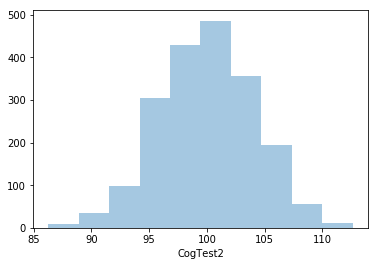

In [15]:
#Running "dist" plot in seaborn ("dist" = distribution). 
#Telling python to use seaborn by prefixing it with sns which we assigned seaborn as when importing above
sns.distplot(df_nonulls['CogTest2'], kde=False, bins = 10)

* You can edit and format the output of charts py passing parameters within your plot parentheses. For example, re-run the above, but with the kde parameter changed to kde=True. 
    + What does this do to your plot? 
    + Why might this be useful? 🤔

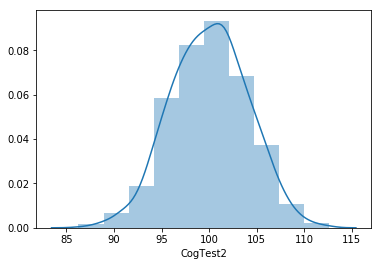

In [17]:
#Re-running hist with kde=True 

sns.distplot(df_nonulls['CogTest2'], kde=True, bins = 10)

* Now display the distribution of **weight** for **female participants only** - are we confident that this data is normally distributed?

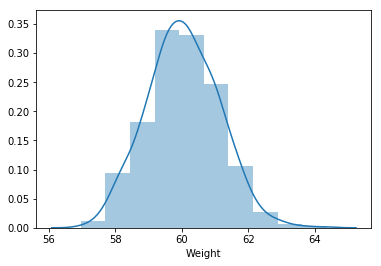

In [18]:
sns.distplot(df_nonulls["Weight"][df_nonulls['Gender'] == 'Female'], kde=True, bins = 10)

📚 **_More information on plotting histograms, and histogram options within seaborn can be found [here](https://seaborn.pydata.org/tutorial/distributions.html)._**

### **Comparing group means using barcharts**

* Bar charts are an effective basic visualistion for eyeballing whether the means between two groups are different

## <font color=green>⌨ Tasks </font>
* Run the below code to check whether mean scores on `CogTest1` look different between males and females

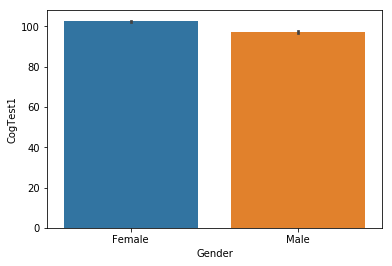

In [19]:
#Running barplot in seaborn (specified by sns), with gender on x axis, and CogTest1 on y axis:
sns.barplot(data=df_nonulls , x="Gender", y="CogTest1")

_Mean scores appear to be slightly greater for females compared to males_

* Using the web / seaborn documentation, look up what the `hue` parameter does.
* Add the `hue` parameter to your `barplot` to see differences between diagnosed and non-diagnosed males and females - any evidence of a difference?
* Additionally, change the colour palette of the plot to "Blues"

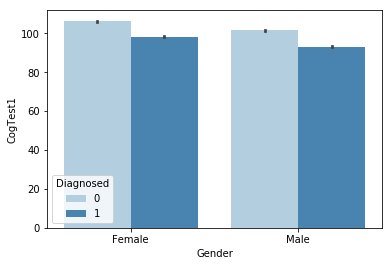

In [20]:
#Adding hue:
sns.barplot(data=df_nonulls , x="Gender", y="CogTest1", palette="Blues", hue="Diagnosed")

_The barchart indicates that there is a difference in scores between diagnosed (lower scores) and non-diagnosed (higher scores) samples - this looks to be similar for both males and females_

📚_**More information on plotting bargraphs, and options within seaborn can be found [here](https://seaborn.pydata.org/generated/seaborn.barplot.html).**_

### Visalising joint relationships using scatterplots

* Scatter plots can be used to visualise the joint relationship between two continuous variables.
* Seaborn offers a number of options for visualising data in a scatter format, including a simple `scatterplot` or `relplot` which allows you to view the `rel`ationship between two variables, as well as the `lmplot` which allows you to plot a linear line of best fit through your data.

## <font color=green>⌨ Tasks </font>
* Run the below code see whether there is any indication of a joint relationship between scores on cognitive test 1 and weight in the df_nonulls dataset, using `relplot`.

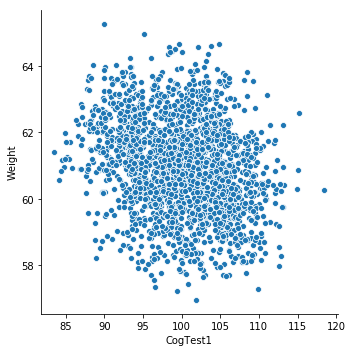

In [21]:
#Generating seaborn scatterplot using relplot ("rel" = "relationship"), with Cogtest1 on x axis and Weight on y axis
sns.relplot(x="CogTest1", y="Weight",data=df_nonulls)

_Plot appears to show a (slight) negative correlation between the two sets of test scores - higher scores on cogtest1 appear to correlate with lower weight_

* Now look at the relationship between height and weight, this time using the `lmplot` visualisation.
    + Is there any evidence of a relationship between these two variables?
    + What is noticeably different about this plot visalisation compared to the one we previously ran with `relplot`?

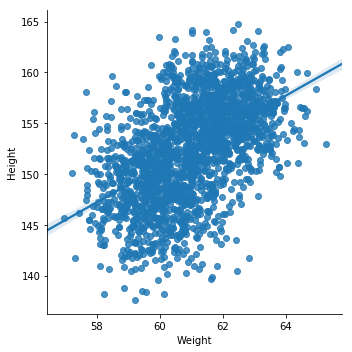

In [22]:
#Generating scatter using replot, to plot weigt (x-axis) against height (y-axis)
sns.lmplot(x="Weight", y="Height",data=df_nonulls)

_Compared to the relplot - lmplot fits a linear line of best fit to our data (the hazy stuff surrounding the line represent the 95% confidence intervals (which in these case are very narrow). This provides us with a clearer picture as we can gain information on the intercept the direction and steepness of the slope_

* As with the other plots, you are able to add extra parameters to scatter visualisations to change formatting or to provide you with extra information.
* What happens when you add `hue="Diagnosed"` to the height/weight scatter plot?
* What about `hue="Gender"?`

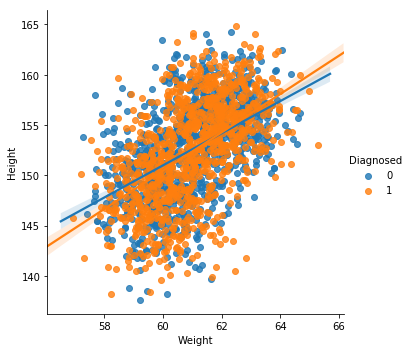

In [23]:
#Re-generating height/weight scatter, with hue=Diagnosed
sns.lmplot(x="Weight", y="Height",data=df_nonulls, hue="Diagnosed")

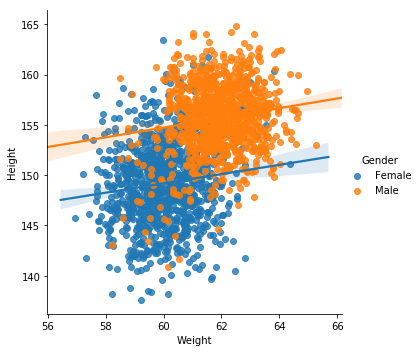

In [24]:
sns.lmplot(x="Weight", y="Height",data=df_nonulls, hue="Gender")

_Height and weight values appear to cluster depending on gender - with females clustering towards lower height/weight values, and males clustering towards higher height/weight values._ 

_As we have grouped our data in both the "Diagnosed" and "Gender" examples, a linear line of best fit is fitted per our grouping variables. In the case of "Diagnosed" - both diagnosed and non-diagnosed groups have a similar (almost identical) intercept and slope. In the case of "gender" however, whilst the slope gradient is similar across groups, the intercept differs noticeably. This can be very useful information to know if you want to identify splits within your data which you may need to correct for - lm plotting functions, together with the hue allow you to do this quickly and simply._

📚 _**More information on scatter plots in seaborn can be found [here](https://seaborn.pydata.org/generated/seaborn.relplot.html) and [here](https://seaborn.pydata.org/generated/seaborn.lmplot.html)**_

🔊 Seaborn has a whole host of charting visualisations and parameter options within each of these. We are only scratching the surface here - spend some time familiarising yourself with some of the [seaborn documentation](https://seaborn.pydata.org/index.html) - this will come in handy during your assessment... 👀

### 💾 Saving figures

* Charting visualisations can be saved using the `savefig()` argument. To do this you must:
    + First assign your chart an object name.
    + Confirm the pathname, filename, and file extension when saving your file (e.g. `/path/to/file/filename.extension`). An example of an extension may be a `.png` or a `.jpeg`. 

## <font color=green>⌨ Task </font>
* Run the below code to generate a barplot visualisation and to save this within your current working directory (so no need to specify `/path/to/file`).

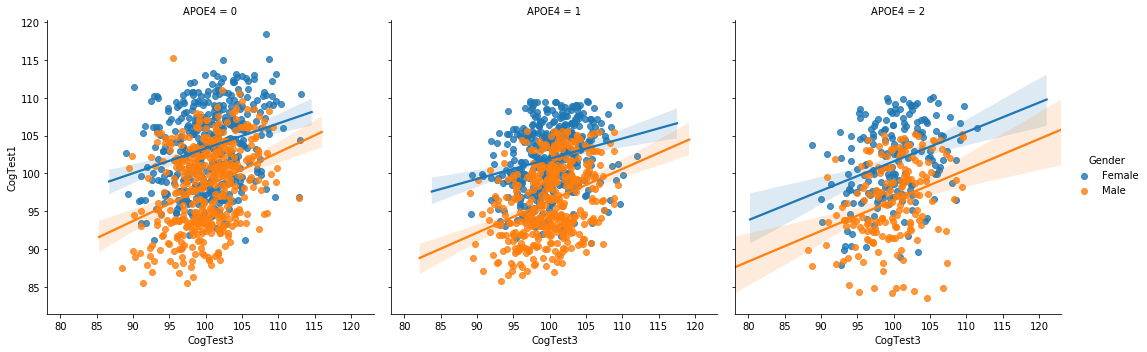

In [25]:
# Generating plot and assigning it to variable 'g'

g=sns.lmplot(x="CogTest3", y="CogTest1",data=df_nonulls, col="APOE4", hue="Gender") #Notice the addition of the 'col' parameter - what do you think this does?

# Saving the plot within current directory by specifying file name and file extension (.png in this case)

g.savefig("myFirstPythonFigure.png")

* !! **Check your directory** !! Is it there? Can you open it? Does it show what you want?


* **Now**:
    + Generate a barplot looking at `Diagnosed` (x axis) against `CogTest1` (y axis).
    + Format the chart so that it is coloured with the "purples" palette.
    + Add a legend for gender
    + Assign the chart to an object named `c`.
    + Save the chart within your current directory named "MySecondPythonFigure", and as a jpeg image.


**Note:** Sometimes (with certain chart types - not sure why 🤷) python won't let you use `savefig` option to save your figure unless you place a `figure` argument before it (e.g. `g.figure.savefig()`). Be aware of this and try adding it if you recieve an error when attempting to save your visualisations.

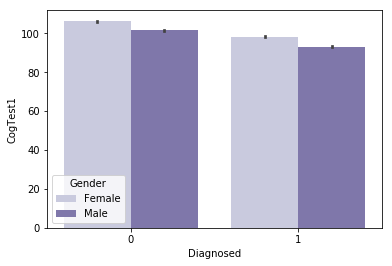

In [26]:
# Generating plot and assigning it to variable 'c'

c=sns.barplot(x="Diagnosed", y="CogTest1",data=df_nonulls, hue="Gender", palette="Purples")

# Saving the plot with .jpeg extension

c.figure.savefig("mySecondPythonFigure.jpeg")

______________________

### (2) Data Analytics 📈

* Plotting raw data can be useful to get a general feel for you data and identify any obvious issues which need to be handled. However, visualising data alone can't quantify any degree of confidence with which any differences or patterns that you may be seeing are meaningful (or rather, statistically significant). To do this, we need to perform some key data analytics.

**Loading stats library**

* As with anything in python, before we can run any of our basic statistics, we will need to import neccessary libraries which allow us to do this.
* Today we will work with two two stats libraries: `scipy` and `statsmodels`. Load these below 👇

In [28]:
# Importing the scipy library and assigning it the name 'stats'
import scipy.stats as stats

# Importing the statsmodels library and assigning it the name 'sm'
import statsmodels.api as sm
from statsmodels.formula.api import ols #This imports a particular stats method we will be using later

### Testing assumptions of normality with Skewness, Kurtosis, and Shapiro-Wilks

* We previously made use of seaborn's histogram charting component to get a feel for how "normal" the distribution of our data looked.


* Data that does not follow a nice bell 🔔 shaped distribution risks violating our assumptions of normality. 


* Histograms are a good starting point to detect any obvious distribution issues, but it is also useful to confirm and quantify these assumptions using statistics.


* Python's `scipy` package allows you to quickly return normality stats using built-in functions such as `shapiro`, `skew`, and `kurtosis`



**Skewness and kurtosis**

**<font color=midnightblue>A reminder of what skewness and kurtosis visually look like:</font>**


![](skew_and_kurtosis.png)

* When looking at the numbers, we'll assume:

    + Anything ±0.5 is moderately skewed, and anything ±0.5 is highly skewed.
    
    + Anything ±4.0 is evidence of kurtosis.

## <font color=green>⌨ Tasks </font>

* Run the code chunks below to confirm whether there is any notable skewness or kurtosis within `CogTest2` results.


* Does this align with what we previously visualised with our histograms?


In [29]:
# Investigating skewness in CogTest2:
stats.skew(df_nonulls["CogTest2"])

-0.0401593295492278

_No evidence of skewness within our cogtest2 measure as -0.04 does not exceed the ±0.5 threshold for which we are assuming violations of our assumptions of non-skewed data_

In [30]:
# Investigating kurtosis in CogTest2:
stats.kurtosis(df_nonulls["CogTest2"])

-0.14955926721228963

_Similarly, no evidence of kurtosis (does not exceed our ±4.0 threshold stated above)._

* Now run the same tests against the `Weight` measure within our `df_nonulls` dataset.

* Any evidence of skewness/kurtosis? Does this align with the assumptions we made from our histogram visualisations?:

In [31]:
# Investigating skewness in Weight:
stats.skew(df_nonulls["Weight"])

-0.02146001192433284

In [32]:
# Investigating kurtosis in Weight:
stats.kurtosis(df_nonulls["Weight"])

-0.5027281086799871

_Again, in agreement with what we saw in our histogrames, there doesn't appear to be any obvious skewness or kurtosis within this measure_

* Finally, run `skew` and `kurtosis` metrics against the `MusicComp` results.

* Any evidence of skewness/kurtosis?

* Plot a histogram using the seaborn charting component (`distplot`) to see whether the stats are in agreement with the visualisation:

In [33]:
# Investigating skewness in MusicComp:
stats.skew(df_nonulls["MusicComp"])

0.6061266267246789

In [34]:
# Investigating kurtosis in MusicComp:
stats.kurtosis(df_nonulls["MusicComp"])

-0.1584007024708396

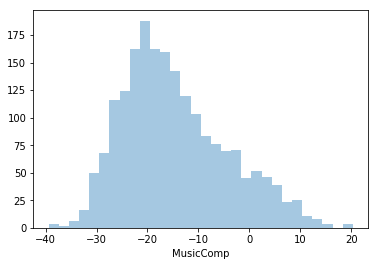

In [35]:
# Plotting histogram to visualise distribution:
sns.distplot(df_nonulls["MusicComp"], kde=False, bins = 30)

_scipy statistics indicate that MusicComp data has a slight positive skew (0.61), which is confirmed in the histogram, where a positive tail is evident. No evidence of kurtosis from the scipy stats. Visually, there does appear to be an unusually pointy "peak", but the girthy tail (evident from the visualisation) likely pulls this stat down. That's why it is always useful to cross check the stats **and** visualisations to get a well rounded picture of the data_

_____
**Shapiro-wilks test of normality**

* Another useful test to (dis)confirm normality assumptions is the shapiro-wilks test - available in `scipy` using the `shapiro` function. 


* The **null hypothesis** for this test is that the data are **normally distributed**. Thus, for assumptions of normality to be met using this statistic, we want to see a **non-significant p-value**.

## <font color=green>⌨ Tasks </font>

* Run the code below to perform a shapiro-wilk test on our `CogTest2` results. 


* Two numbers are returned within the output. What do each of these refer to (information can be found [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html))?


* Do results suggest that normality assumptions are met for this cognitive measure?

In [36]:
# Running shapiro test available within the scipy ("stats") library against CogTest2:
stats.shapiro(df_nonulls["CogTest2"])

(0.9991613626480103, 0.5161389708518982)

_The first number returned represents the test-statistic for the shapiro-wilks test, and the second number represents the corresponding p-value. As p>.05 (aka non-signficant), we can **reject** the **null hypothesis**, and assume normality assumptions are met._



* Use the same code to test normality assumptions for our `weight` variable.


* Do results suggest noramlity assumptions are met for this measure?


* Does this result match the assumptions we made when looking at our histogram? 

In [37]:
# Running shapiro-wilks against weight:
print(stats.shapiro(df_nonulls["Weight"]))

(0.9957279562950134, 2.0729266907437705e-05)




* What about when you test the distribution for females only?

* And men only?

In [38]:
#Testing shapiro-wilks for weight, filtered so female weight scores only
stats.shapiro(df_nonulls["Weight"][df_nonulls['Gender'] == 'Female'])

(0.9973703026771545, 0.10896418988704681)

In [39]:
# Testing shapiro-wilks for weight, filtered so male weight scores only
stats.shapiro(df_nonulls["Weight"][df_nonulls['Gender'] == 'Male'])

(0.9971877932548523, 0.08280333876609802)

## <font color=green>💬 Discussion </font>

* How may we explain what is going on here? 🤔

_Our shapiro-wilks test indicates that assumptions of normality for our weight variable are violated (p=0.00002). Yet our histogram for weight looks well distributed..._

_It appears that under the surface of what we can see with the naked eye, there are 2 subtle, but distinct distributions making up our weight results - one normal distribution for female weights, and one normal distribution for male weights (as indicated by the non-significant shapiro results for each of these). If the mean of these distributions were very distinct (e.g. mean f = 60, mean m = 80), we would see 2 clear peaks in our hisogram (known as a bimodal distribution (bi=2). However, sometimes seperation in our data can be subtle (but real!) - which is why it's always important to cross check what we see in our visualisations, with what the stats are telling us_

____

### Comparing differences between **two groups** using a t-test

**<font color=midnightblue>A reminder</font>**

* T-tests are used when you have **2 groups** and the dependent measure is **continuous**.


* It compares the mean result from group 1 against the mean of group 2.


* There are various types of t-tests (today we will just perform the first of these):
    + **Independent samples test** which measures mean differences assuming results from group 1 and group 2 are from different individuals
    + **Paired samples test** which assumes results from group 1 and 2 are matched (e.g. in a repeated measures design).
    + **One sample test** which tests the results from a single group against a known mean.


* The t-test returns a "t-statistic" which has a corresponding p-value as an indication of whether differences in the means are significant.

**T-test within the [scipy library](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)**

* We can use the `ttest` function within the `scipy` library to return a t-statistic and corresponding p-value for a comparison between two sets of means.


* The `_ind` option can also be used to confirm that we are looking for an **independent** samples test.


* _**Note**_ The t-test is a parametric test and so works according to our normality assumption. We have already confirmed that this assumption is met for scores within our `CogTest2` metric, so we can utilise this measure to run our test.

## <font color=green>⌨ Tasks </font>

Imagine that our `Diagnosed` metric corresponds to whether an individual has recieved a diagnosis of dementia (1) or has recieved no such diagnosis (0)...


* Run the below code to test the following hypotheses:
    + _H1_: There is a signficant difference in cognitive performance between individuals diagnosed with dementia compared to those not diagnosed.
    + _H0_: There is no signficant difference in cognitive performance between individuals diagnosed with dementia compared to those not diagnosed.
    
    
* Based on the t-statistic and pvalue returned, which hypothesis should we accept, and which should we reject?

In [40]:
# Running independent samples t-test of cogtest2 scores against non-diagnosed (0) and diagnosed (1) individuals:
stats.ttest_ind((df_nonulls["CogTest2"][df_nonulls['Diagnosed'] ==0]), 
                (df_nonulls["CogTest2"][df_nonulls['Diagnosed'] ==1])) 


Ttest_indResult(statistic=5.916797882677064, pvalue=3.860037823536076e-09)

_Our results indicate that there is a significant difference between the test scores for our diagnosed group verses our non-diagnosed group, with a _very_ small p-value of 0.000000003. We can therefore reject our null hypothesis (_H1_) and conclude that there is a significant difference in cognitive performance between the two groups_

* Run a second t-test, but this time looking at differences in `CogTest3` scores between males and females:


In [41]:
# Running independent samples t-test of cogtest3 scores against non-diagnosed (0) and diagnosed (1) individuals:
stats.ttest_ind((df_nonulls["CogTest3"][df_nonulls['Gender'] =="Female"]), 
                (df_nonulls["CogTest3"][df_nonulls['Gender'] =="Male"])) 

# Or, alternatively you could have used the numeric measure (both would give the same results):
stats.ttest_ind((df_nonulls["CogTest3"][df_nonulls['Sex'] ==0]), 
                (df_nonulls["CogTest3"][df_nonulls['Sex'] ==1])) 

Ttest_indResult(statistic=-1.4050014694688135, pvalue=0.16017810460735143)

## <font color=green>💬 Discussion </font>
* Is there any evidence of a significant difference in cognitive test scores for this measure between males and females?


_Results from the independent samples t-test do not provide evidence of a significant difference in cognitive test 3 scores between males and females (p=0.16)._

____

### Comparing differences between three of more groups using ANOVA

**<font color=midnightblue>A reminder</font>**

* ANOVAs are used when you have **3 or more groups** and when dependent measures are **continuous**.


* It is similar to the t-test, but compares the means across all groups to determine whether there is an overall signficant difference in means across groups.


* In an ANOVA - the test statistic is an F (rather than t), and the p-value provides an indication of whether differences in the means across groups are significant.

* Like T-tests - they assume normally distributed data

**ANOVA within the [scipy library](https://pythonfordatascience.org/anova-python/)**

* We can use the `f` function within the `scipy` library to return an f-statistic and corresponding p-value for a comparison between 3 or more means.


* The `_oneway` option can also be used to confirm that we are looking for a **oneway** ANOVA (i.e. we're interested in one independent variable).

## <font color=green>⌨ Tasks </font>

**Background:**
* APOE4 is a genetic risk factor that is highly associatde with Alzheimer's Disease (a form of dementia). 
* All individuals have two copies of their genes (1 copy inherited from their mum, and one from their dad).
* Therefore, an individual may have 1 copy of the APOE4 gene, 2 copies, or 0 copies. 
* Past research indicates that there is a "dosage" effect of APOE4 on cognition and dementia risk.


* Run the below code to test the hypothesis that differences in APOE4 "dosage" (i.e. whether you have 0,1 or 2 copies) is signficantly associated with cognitive test results, using our CogTest2 scores which we have already confirmed meet our normality assumptions.
    

In [42]:
stats.f_oneway(df_nonulls['CogTest2'][df_nonulls['APOE4'] == 0], 
             df_nonulls['CogTest2'][df_nonulls['APOE4'] == 1],
             df_nonulls['CogTest2'][df_nonulls['APOE4'] == 2])

F_onewayResult(statistic=4.5046361249176075, pvalue=0.011171517856593807)

## <font color=green>💬 Discussion </font>

* Based on the t-statistic and pvalue returned, is there support for our hypothesis?


_Results indicate a significant difference in the CogTest2 mean scores between our APOE4 groups, providing support for our hypothesis._

____
**(optional) Homework**

* The `scypi` results give us a quick answer to our hypothesis. The results are all rather vague though! 😩 It's great that we can confirm an f-stat and p-value, but that doesn't really provide us with a rich source of information to interpret...


* The `statsmodels` library that we also imported it earlier can be a handy additional tool in your toolbox for if you want to gain a richer insight into your results.


* The `ols` function within the `statsmodels` library can be used to gather ANOVA statistics (note: OLS is actually a regression method, but within it we can obtain the stats (and more!) that we need.


* More information about ANOVAs in the `statsmodels` package can be found [here](https://pythonfordatascience.org/anova-python/). Explore it in your own time and see what other information you may be able to extract.

____

### Investigating the strength and direction of relationship using Pearsons Correlation

**<font color=midnightblue>A reminder</font>**

* A pearson's correlation is used to compare the direction and strength of **two continuous variables**.


* The correlation coefficient is represented as `r`.


* r can fall anywhere between -1 and +1. 

    + An r of 0 indicates no relationship between 2 variables at all.

    + An r of -1 indicates a perfect negative correlation (as 1 variable goes up, the other variable goes down, at exactly the same rate).

    + An r of +1 indicates a perfect positive correlation (as 1 variable goes up, the other variable also goes up, at exactly the same rate).

    + The higher the number towards 1 - the greater the strength of relationship. + vs - represents directionality.


* You **cannot** infer causality from a correlation - it provides no information to which variable is driving the relationship.

**Pearson's correlation within pandas 🐼**


* Pandas actually comes with the ability to return correlation coefficients - so no need for external stats packages here (more information [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)).


* Calling the `.corr()` function within our `pd` library will create a correlation matrix for you and gives you the correlation coefficiant.


* You can additionally style the correlation matrix returned using the `style.background_gradient` function to apply overlay a heatmap onto the coefficients returned.

## <font color=green>⌨ Tasks </font>

* Run the code below to produce a correlation matrix for all of your continous cognitive measures:

In [43]:
# Producing correlation coefficients
df_nonulls[["CogTest1", "CogTest2", "CogTest3", "SpeedComp"]].corr()

,CogTest1,CogTest2,CogTest3,SpeedComp
CogTest1,1.000000,0.226810,0.279987,0.307476
CogTest2,0.226810,1.000000,0.001678,-0.003404
CogTest3,0.279987,0.001678,1.000000,0.003751
SpeedComp,0.307476,-0.003404,0.003751,1.000000


* Overlay results within a heatmap using the below code:

In [44]:
#Adding heatmap:
df_nonulls[["CogTest1", "CogTest2", "CogTest3", "SpeedComp"]].corr().style.background_gradient(cmap='coolwarm')

,CogTest1,CogTest2,CogTest3,SpeedComp
CogTest1,1,0.22681,0.279987,0.307476
CogTest2,0.22681,1,0.00167813,-0.00340431
CogTest3,0.279987,0.00167813,1,0.00375072
SpeedComp,0.307476,-0.00340431,0.00375072,1


## <font color=green>💬 Discussion </font>
* Which 2 measures have the strongest relationship? What is the coefficient for this?
* Is the direction of effect between CogTest1 and SpeedComp positive or negative? How would you interpret this?
* Overall - would you say these measures are well correlated with each other? Why/why not?



**Height and weight**
* Confirm pearsons r for height against weight.

    + Is there evidence of a strong relationship between the two?
    + Is the direction of relationship positive or negative?
    + Is this in agreement with what we saw on our scatter plot earlier today?

In [45]:
# Producing correlation coefficients for height against weight
df_nonulls[["Height", "Weight"]].corr()

,Height,Weight
Height,1.000000,0.503323
Weight,0.503323,1.000000


_Results indicate a moderate, positive relationship between between these two variables. This is in agreement with what we saw on our scatter plots earlier today._

_psssst👀_  
* The pandas correlation matrix doesn't allow you to return a p-value against your r statistic unfortunately. 
* However, you can use the `pearsonr` function within the `scipy` library to get this information if required (see [here](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pearsonr.html)).
* Caveat with this is that you can only return **one** coefficient and p-val at a time, rather than spit out results into an overall matrix to compare a set of results (there are functions you can write to achieve this, but let's not overly complicate things on day 3, just know it's possible!).


* As an example, run the below code to obtain a p-value for the weight-height correlation coefficient:

In [46]:
stats.pearsonr(df_nonulls["Height"],df_nonulls["Weight"])

(0.5033229268900158, 1.8362164442608985e-127)

## <font color=green>💬 Discussion </font>
* Is there evidence of a significant relationship?


_EXTREMELY SIGNIFICANT!!_

____
**Some final learning tasks 🙌**

- Have a look at the documentation for the seaborn library - play around with other charting components and parameters to see what other visualisations you can produce.


- Confirm p-values for each of the cognitive measure correlation coefficients using scipy. 
    + Any evidence of significant relationships amongst these measures?
    + Any unexpected p-values based on the value of the coefficient?


____
**(optional) Homework 📚:**
- Take a look at some of the documentation for running regressions within the `statsmodels` library (for linear regression: [here](https://datatofish.com/statsmodels-linear-regression/). for logistic regression: [here](http://blog.yhat.com/posts/logistic-regression-and-python.html) We didn't have time to cover this method today but it will be an extremely useful tool in your toolbox if you're looking to develop your datascience skills further.
    + Attempt to write a piece of code using logistic regression and the statsmodel library to model the relationship between CogTest2 (predictor) and Diagnosed (dependent measure). 
    + What is the regression coefficient returned? Is it positive or negative?
    + Is the regression coefficient significant?

____
### NEXT WEEK  👀

+ We'll do some (basic) machine learning! 🎰
    
    
+ Last 30 mins: We'll wrap up what we've learnt over the last 4 weeks. Please come with any questions! ❓


+ Overview of assessment structure and expectations 📝

🙋

